# Plots abs, diff for PI and PD separate

### Div imports:

In [1]:
# load and autoreload
from IPython import get_ipython
from matplotlib import colors
from useful_scit.imps import (plt)

from sect_sens.constants import get_plotpath
from sect_sens.data_info.simulation_types import get_diff_by_type
from sect_sens.util.imports import get_averaged_fields
from sect_sens.util.practical_functions import make_folders
from sect_sens.data_info.simulation_types import get_abs_by_type

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

from sect_sens.util.plot.maps_PIPD import abs_diffs_PI_PD_sep

/home/ubuntu/mnts/nird/projects/SECT_SENS/sect_sens/data_info/area_defs.csv
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Div settings: 

In [2]:
p_level = 1013.
pmin = 850.  # minimum pressure level
avg_over_lev = True  # True#True#False#True
pressure_adjust = True  # Can only be false if avg_over_lev false. Plots particular hybrid sigma lev
p_levels = [1013., 900., 800., 700., 600.]  # used if not avg

In [3]:
model = 'NorESM'

startyear = '0004-01'
endyear = '0005-12'

In [5]:
cases_sec = [
    'NF1850_SECT_ctrl',
    'NF1850_aeroxid2014_SECT_ctrl',
    'NF1850_SECT_svoc_smax',
    'NF1850_aeroxid2014_SECT_svoc_smax',
    'NF1850_SECT_elvoc_smax',
    'NF1850_aeroxid2014_SECT_elvoc_smax',

]
cases_orig = [
    'NF1850_noSECT_def',
    'NF1850_aeroxid2014_noSECT_def',
    'NF1850_aeroxid2014_noSECT_ox_ricc',
    'NF1850_noSECT_ox_ricc'
]

cases = cases_orig + cases_sec

### For output names:

In [6]:
version = 'pi_pd_diff-elsvoc'
plot_path = get_plotpath('maps')
filen_base = plot_path + '/%s' % version
# print(plot_path)
make_folders(plot_path)

In [7]:
print(filen_base)

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/maps//pi_pd_diff-elsvoc


### Variables to load:

In [8]:
varl = ['NCONC01', 'NMR01', 'N_AER', 'ACTNL_incld', 'ACTREL_incld', 'CDNUMC', 'cb_NA',
        'cb_SOA_NA', 'cb_SO4_NA', 'AWNC_incld', 'AREL_incld',
        'SWCF_Ghan', 'LWCF_Ghan', 'NCFT_Ghan']
subfig_size = 2.9
asp_ratio = .9
print(varl)

['NCONC01', 'NMR01', 'N_AER', 'ACTNL_incld', 'ACTREL_incld', 'CDNUMC', 'cb_NA', 'cb_SOA_NA', 'cb_SO4_NA', 'AWNC_incld', 'AREL_incld', 'SWCF_Ghan', 'LWCF_Ghan', 'NCFT_Ghan']


## Load data from file: 
The following algortithm computes and loades map averages. 

In [9]:

case_dic = get_averaged_fields.get_maps_cases(cases,
                                              varl,
                                              startyear,
                                              endyear,
                                              avg_over_lev=avg_over_lev,
                                              pmin=pmin,
                                              pressure_adjust=pressure_adjust,
                                              p_level=p_level,
                                              )

Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/map_means//NorESM/NF1850_noSECT_def/NCONC01_0004-01-0005-12_avg2lev850.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/map_means//NorESM/NF1850_noSECT_def/NMR01_0004-01-0005-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/map_means//NorESM/NF1850_noSECT_def/N_AER_0004-01-0005-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/map_means//NorESM/NF1850_noSECT_def/ACTNL_incld_0004-01-0005-12_lev_not_dim.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/map_means//NorESM/NF1850_noSECT_def/ACTREL_incld_0004-01-0005-12_lev_not_dim.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/map_means//NorESM/NF1850_noSECT_def/CDNUMC_0004-01-0005-12_lev_not_dim.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/map_means//NorESM/NF1850_noSECT_def/cb_NA_0004-01-0005-12_lev_not_dim.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/map_means//NorESM/NF1850_

## Calculate various variables:

In [10]:
for case in cases:
    _ds = case_dic[case]
    _ds['NPF_frac'] = _ds['NCONC01'] / _ds['N_AER'] * 100
    _ds['NPF_frac'].attrs['units'] = '%'
if 'NPF_frac' not in varl:
    varl.append('NPF_frac')

In [11]:
relative = False
dic_diff = get_diff_by_type(case_dic, varl, ctrl='PI', case_types=['PI', 'PIaerPD'],
                            # mod_types=['OsloAeroSec','OsloAero$_{def}$'],
                            relative=relative)

dic_diff.keys()
di_dic = dic_diff['PIaerPD-PI']
di_dic.keys()

['PI', 'PIaerPD'] ['OsloAeroSec', 'OsloAero$_{imp}$', 'OsloAero$_{def}$']
subtracting NF1850_SECT_ctrl-NF1850_SECT_ctrl
subtracting NF1850_noSECT_ox_ricc-NF1850_noSECT_ox_ricc
subtracting NF1850_noSECT_def-NF1850_noSECT_def
subtracting NF1850_aeroxid2014_SECT_ctrl-NF1850_SECT_ctrl
subtracting NF1850_aeroxid2014_noSECT_ox_ricc-NF1850_noSECT_ox_ricc
subtracting NF1850_aeroxid2014_noSECT_def-NF1850_noSECT_def


dict_keys(['OsloAeroSec', 'OsloAero$_{imp}$', 'OsloAero$_{def}$'])

### Organize data in easy to use format:

In [12]:
relative = False

dic_abs = get_abs_by_type(case_dic,
                          case_types=['PI', 'PIaerPD'],
                          mod_types=['OsloAeroSec', 'OsloAeroSec$_{svoc}$', 'OsloAeroSec$_{elvoc}$', 'OsloAero$_{imp}$',
                                     'OsloAero$_{def}$'], )

['PI', 'PIaerPD'] ['OsloAeroSec', 'OsloAeroSec$_{svoc}$', 'OsloAeroSec$_{elvoc}$', 'OsloAero$_{imp}$', 'OsloAero$_{def}$']


## Plots:

/home/ubuntu/mnts/nird/projects/SECT_SENS/sect_sens/util/plot/plot_maps.py:117: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


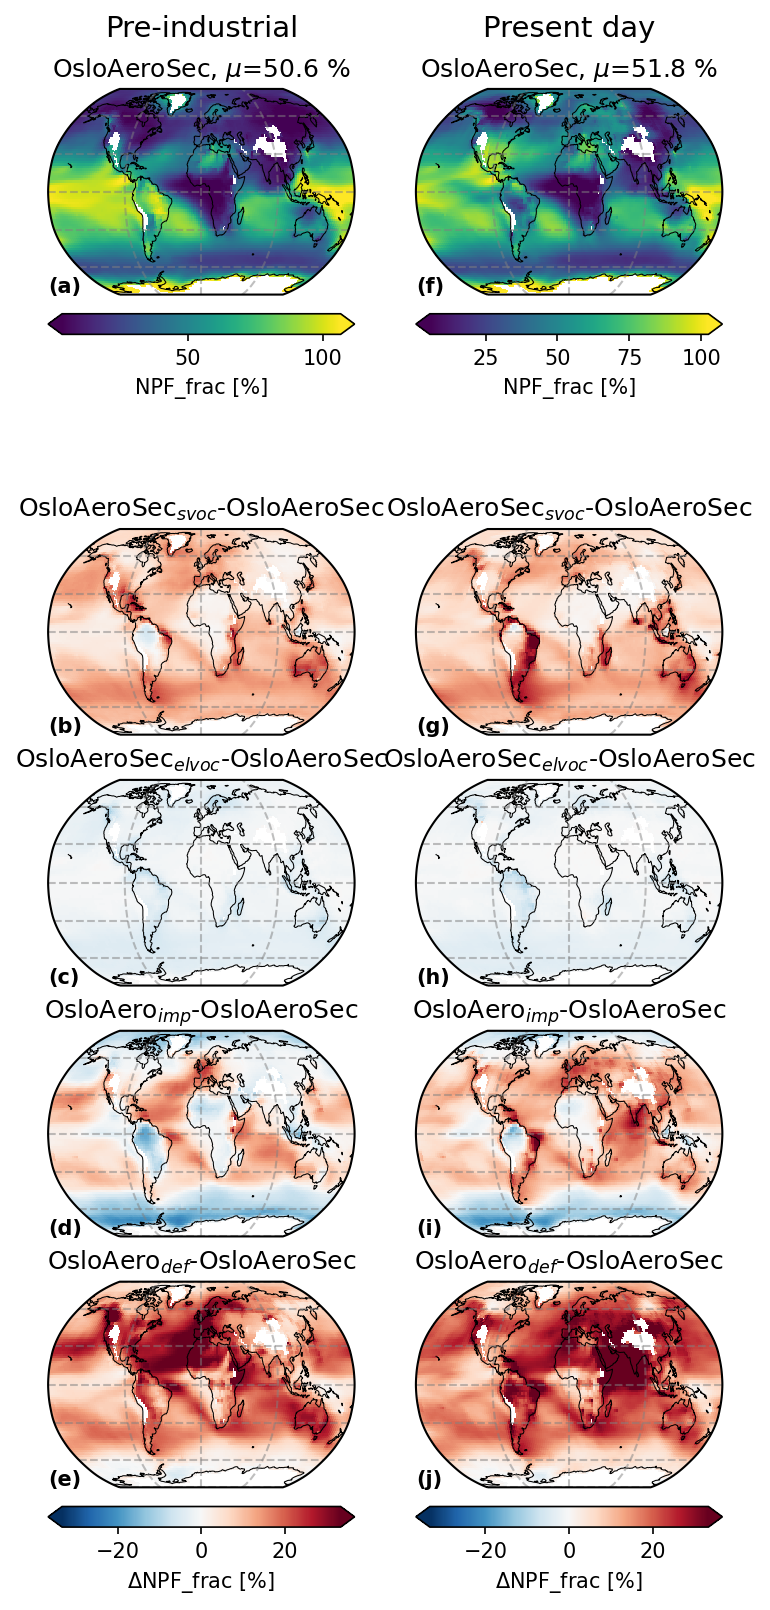

In [13]:
var = 'NPF_frac'
relative = False
fig, axs_dic = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   relative=relative,
                                   cases_oth=['OsloAeroSec$_{svoc}$', 'OsloAeroSec$_{elvoc}$', 'OsloAero$_{imp}$',
                                              'OsloAero$_{def}$'],
                                   # , 'ACTNL_incld', 'ACTREL_incld'],
                                   # norm_abs=norm_abs,
                                   # norm_dic=norm_dic
                                   type_nndic={'PI': 'Pre-industrial', 'PIaerPD': 'Present day'}
                                   )
fig.savefig(filen_base + f'{var}_PIPD_sep_rel{relative}.pdf', dpi=300)
plt.show()

In [14]:
norm_diff_dic = dict(
    ACTNL_incld=colors.Normalize(vmin=-20, vmax=20),
    N50=colors.Normalize(vmin=-45, vmax=45),
    N100=colors.Normalize(vmin=-20, vmax=20),
    N150=colors.Normalize(vmin=-10, vmax=10),  # colors.Normalize(vmin=-5, vmax=5),
    N200=colors.Normalize(vmin=-15, vmax=15),  # colors.Normalize(vmin=-5, vmax=5),
)

In [15]:
norm_diff_dic = dict(
    ACTNL_incld=colors.Normalize(vmin=-12, vmax=12),
    N50=colors.Normalize(vmin=-45, vmax=45),
    N100=colors.Normalize(vmin=-10, vmax=10),
    N150=colors.Normalize(vmin=-4, vmax=4),  # colors.Normalize(vmin=-5, vmax=5),
    N200=colors.Normalize(vmin=-5, vmax=5),  # colors.Normalize(vmin=-5, vmax=5),
)

In [16]:
norm_dic = dict()
norm_dic['NCFT_Ghan'] = colors.Normalize(vmin=-1.8, vmax=1.8)
norm_dic['ACNTL_incld'] = colors.SymLogNorm(vmin=-40, vmax=40, linthresh=1, linscale=0.4, base=10)

/home/ubuntu/mnts/nird/projects/SECT_SENS/sect_sens/util/plot/plot_maps.py:117: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


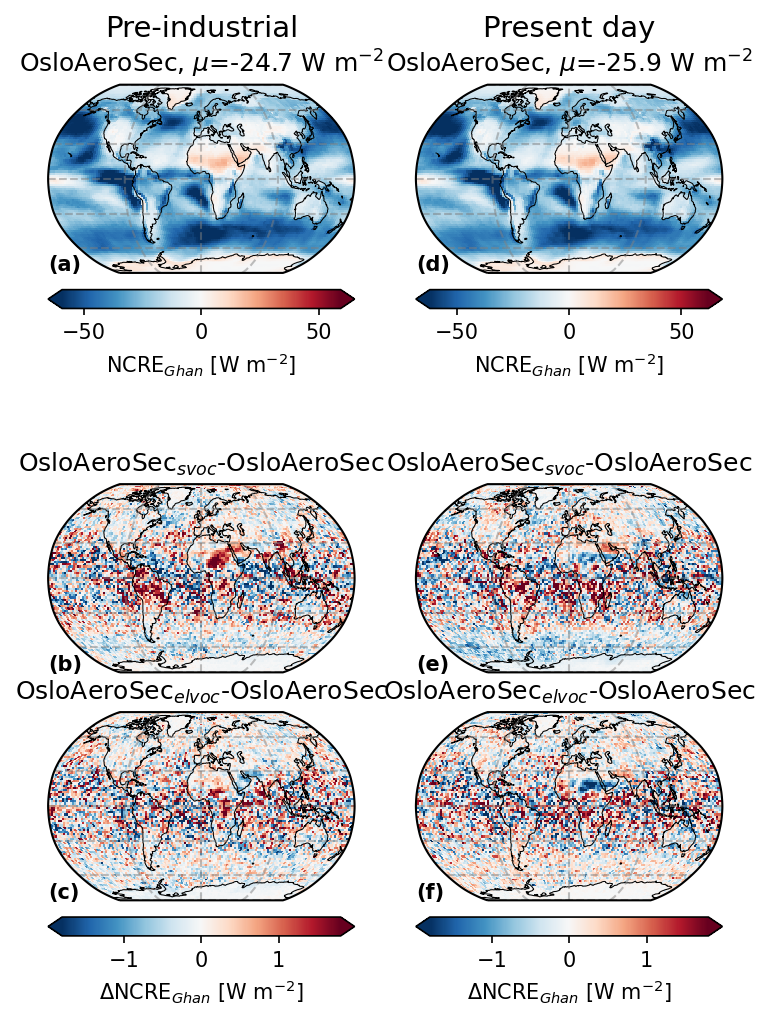

In [17]:
var = 'NCFT_Ghan'
relative = False
fig, axs_dic = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   relative=relative,
                                   type_nndic={'PI': 'Pre-industrial', 'PIaerPD': 'Present day'},
                                   switch_diff=False,
                                   cases_oth=['OsloAeroSec$_{svoc}$', 'OsloAeroSec$_{elvoc}$'],
                                   # ,'OsloAero$_{imp}$', 'OsloAero$_{def}$'],

                                   norm_diff=norm_dic['NCFT_Ghan'],
                                   # norm_diff=colors.Normalize(vmin=-100, vmax=100)
                                   )
# axs =[axs_dic['PI'][c] for c in ['OsloAeroSec','OsloAero$_{imp}$', 'OsloAero$_{def}$']]#[cases_oth]
# subp_insert_abc(np.array(axs), pos_x=0.01,pos_y=1.0)
# fig.savefig(filen_base + f'{var}_PIPD_sep_rel{relative}.pdf', dpi=300)
plt.show()

0 PI
1 PIaerPD
0 PI


/home/ubuntu/mnts/nird/projects/SECT_SENS/sect_sens/util/plot/plot_maps.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


1 PIaerPD


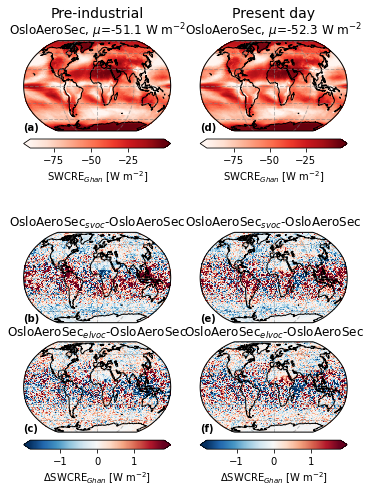

In [21]:
var = 'SWCF_Ghan'
relative = False
fig, axs_dic = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   relative=relative,
                                   type_nndic={'PI': 'Pre-industrial', 'PIaerPD': 'Present day'},
                                   switch_diff=False,
                                   norm_diff=norm_dic['NCFT_Ghan'],
                                   # norm_diff=colors.Normalize(vmin=-100, vmax=100)
                                   cases_oth=['OsloAeroSec$_{svoc}$', 'OsloAeroSec$_{elvoc}$'],
                                   # ,'OsloAero$_{imp}$', 'OsloAero$_{def}$'],

                                   )
# fig.savefig(filen_base + f'{var}_PIPD_sep_rel{relative}.pdf', dpi=300)
plt.show()

In [ ]:
var = 'LWCF_Ghan'
relative = False
fig, axs_dic = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   relative=relative,
                                   type_nndic={'PI': 'Pre-industrial', 'PIaerPD': 'Present day'},
                                   switch_diff=True,
                                   norm_diff=norm_dic['NCFT_Ghan'],
                                   # norm_diff=colors.Normalize(vmin=-100, vmax=100)
                                   cases_oth=['OsloAeroSec$_{svoc}$', 'OsloAeroSec$_{elvoc}$'],
                                   # ,'OsloAero$_{imp}$', 'OsloAero$_{def}$'],

                                   )
fn = filen_base + f'{var}_PIPD_sep_rel{relative}.pdf'
fig.savefig(fn, dpi=300)
plt.show()

In [ ]:
print(fn)

0 PI
1 PIaerPD
0 PI


/home/ubuntu/mnts/nird/projects/SECT_SENS/sect_sens/util/plot/plot_maps.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


1 PIaerPD


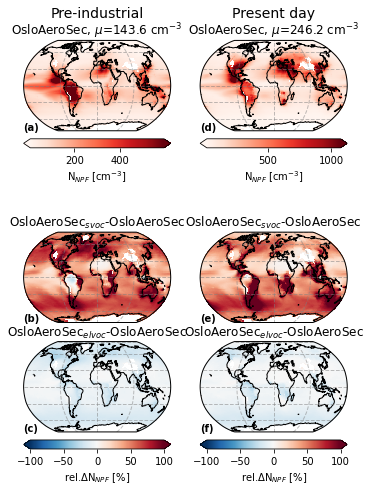

In [22]:
var = 'NCONC01'
relative = True
fig, axs_dic = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   relative=relative,
                                   type_nndic={'PI': 'Pre-industrial', 'PIaerPD': 'Present day'},
                                   switch_diff=False,
                                   norm_diff=colors.Normalize(vmin=-100, vmax=100),
                                   cases_oth=['OsloAeroSec$_{svoc}$', 'OsloAeroSec$_{elvoc}$'],
                                   # 'OsloAero$_{imp}$', 'OsloAero$_{def}$'],

                                   )
# fig.savefig(filen_base + f'{var}_PIPD_sep_rel{relative}.pdf', dpi=300)
plt.show()

<xarray.DataArray 'ACTNL_incld' ()>
array(12.73729246)
Coordinates:
    quantile  float64 0.95 <xarray.DataArray 'ACTNL_incld' ()>
array(-12.73729246)
Coordinates:
    quantile  float64 0.95
0 PI
1 PIaerPD
0 PI


/home/ubuntu/mnts/nird/projects/SECT_SENS/sect_sens/util/plot/plot_maps.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


1 PIaerPD


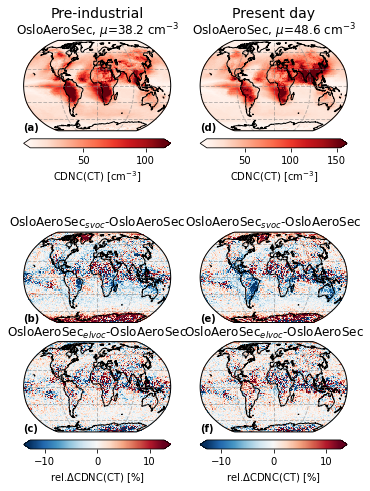

In [23]:
var = 'ACTNL_incld'
relative = True
fig, axs_dic = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   relative=relative,
                                   type_nndic={'PI': 'Pre-industrial', 'PIaerPD': 'Present day'},
                                   switch_diff=False,
                                   cases_oth=['OsloAeroSec$_{svoc}$', 'OsloAeroSec$_{elvoc}$'],
                                   # 'OsloAero$_{imp}$', 'OsloAero$_{def}$'],

                                   # norm_diff=colors.Normalize(vmin=-100, vmax=100)
                                   )
# fig.savefig(filen_base + f'{var}_PIPD_sep_rel{relative}.pdf', dpi=300)
plt.show()

<xarray.DataArray 'CDNUMC' ()>
array(19.50023432)
Coordinates:
    quantile  float64 0.05 <xarray.DataArray 'CDNUMC' ()>
array(-19.50023432)
Coordinates:
    quantile  float64 0.05
0 PI
1 PIaerPD
0 PI


/home/ubuntu/mnts/nird/projects/SECT_SENS/sect_sens/util/plot/plot_maps.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


1 PIaerPD


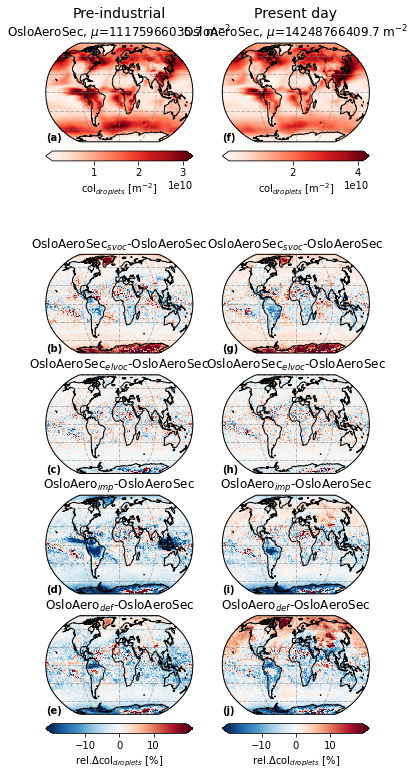

In [24]:
var = 'CDNUMC'
relative = True
fig, axs_dic = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   relative=relative,
                                   type_nndic={'PI': 'Pre-industrial', 'PIaerPD': 'Present day'},
                                   switch_diff=False,
                                   cases_oth=['OsloAeroSec$_{svoc}$', 'OsloAeroSec$_{elvoc}$', 'OsloAero$_{imp}$',
                                              'OsloAero$_{def}$'],

                                   # norm_diff=colors.Normalize(vmin=-100, vmax=100)
                                   )
# fig.savefig(filen_base + f'{var}_PIPD_sep_rel{relative}.pdf', dpi=300)
plt.show()

<xarray.DataArray 'N50' ()>
array(43.04516624)
Coordinates:
    quantile  float64 0.05 <xarray.DataArray 'N50' ()>
array(-43.04516624)
Coordinates:
    quantile  float64 0.05
0 PI
1 PIaerPD
0 PI


/home/ubuntu/mnts/nird/projects/SECT_SENS/sect_sens/util/plot/plot_maps.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


1 PIaerPD


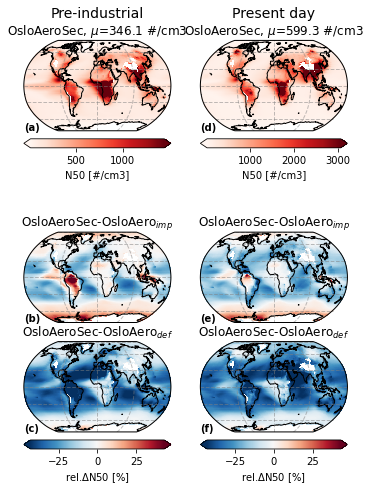

In [109]:
var = 'N50'
relative = True
fig, axs_dic = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   relative=relative,
                                   type_nndic={'PI': 'Pre-industrial', 'PIaerPD': 'Present day'},
                                   switch_diff=True,
                                   # norm_diff=colors.Normalize(vmin=-30, vmax=30)
                                   )
fig.savefig(filen_base + f'{var}_PIPD_sep_rel{relative}.pdf', dpi=300)
plt.show()

0 PI
1 PIaerPD
0 PI


/home/ubuntu/mnts/nird/projects/SECT_SENS/sect_sens/util/plot/plot_maps.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


1 PIaerPD


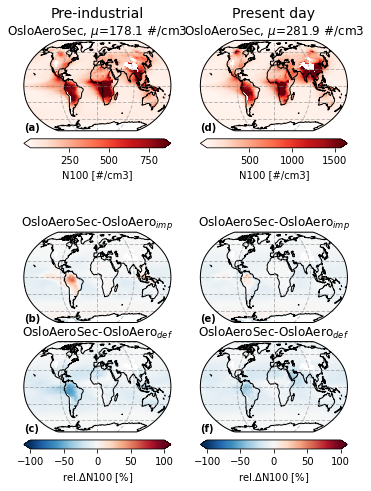

In [110]:
var = 'N100'
relative = True
fig, axs_dic = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   relative=relative,
                                   type_nndic={'PI': 'Pre-industrial', 'PIaerPD': 'Present day'},
                                   switch_diff=True,
                                   norm_diff=colors.Normalize(vmin=-100, vmax=100)
                                   )
fig.savefig(filen_base + f'{var}_PIPD_sep_rel{relative}.pdf', dpi=300)
plt.show()

<xarray.DataArray 'N150' ()>
array(7.99950447)
Coordinates:
    quantile  float64 0.95 <xarray.DataArray 'N150' ()>
array(-7.99950447)
Coordinates:
    quantile  float64 0.95
0 PI
1 PIaerPD
0 PI


/home/ubuntu/mnts/nird/projects/SECT_SENS/sect_sens/util/plot/plot_maps.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


1 PIaerPD


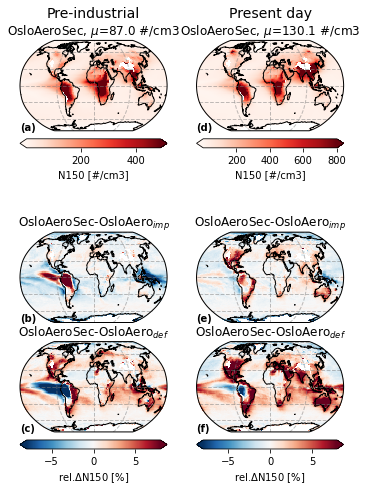

In [111]:
var = 'N150'
relative = True
fig, axs_dic = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   relative=relative,
                                   type_nndic={'PI': 'Pre-industrial', 'PIaerPD': 'Present day'},
                                   switch_diff=True,
                                   # norm_diff=colors.Normalize(vmin=-100, vmax=100)
                                   )
fig.savefig(filen_base + f'{var}_PIPD_sep_rel{relative}.pdf', dpi=300)
plt.show()

0 PI
1 PIaerPD
0 PI


/home/ubuntu/mnts/nird/projects/SECT_SENS/sect_sens/util/plot/plot_maps.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


1 PIaerPD


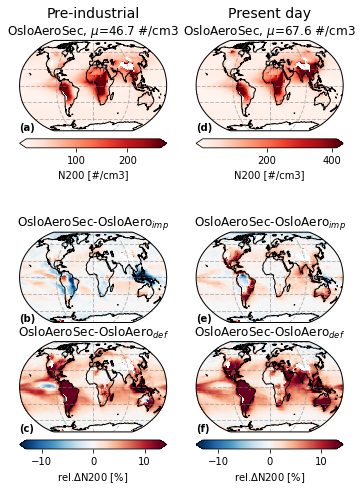

In [112]:
var = 'N200'
relative = True
fig, axs_dic = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   relative=relative,
                                   type_nndic={'PI': 'Pre-industrial', 'PIaerPD': 'Present day'},
                                   switch_diff=True,
                                   norm_diff=colors.Normalize(vmin=-13, vmax=+13)
                                   # norm_diff=colors.Normalize(vmin=-100, vmax=100)
                                   )
fig.savefig(filen_base + f'{var}_PIPD_sep_rel{relative}.pdf', dpi=300)
plt.show()

0 PI
1 PIaerPD
0 PI


/home/ubuntu/mnts/nird/projects/SECT_SENS/sect_sens/util/plot/plot_maps.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


1 PIaerPD


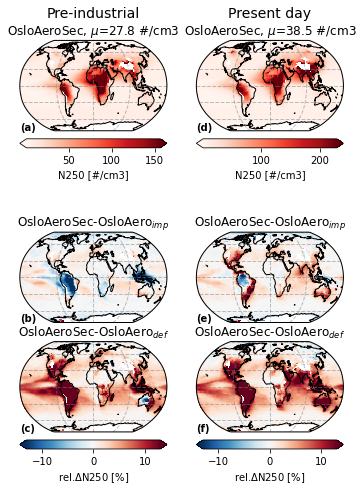

In [113]:
var = 'N250'
relative = True
fig, axs_dic = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   relative=relative,
                                   type_nndic={'PI': 'Pre-industrial', 'PIaerPD': 'Present day'},
                                   switch_diff=True,
                                   # norm_diff=colors.Normalize(vmin=-100, vmax=100)
                                   norm_diff=colors.Normalize(vmin=-13, vmax=+13)
                                   )
fig.savefig(filen_base + f'{var}_PIPD_sep_rel{relative}.pdf', dpi=300)
plt.show()

In [ ]:
var = 'AWNC_incld'
relative = True
fig, axs_dic = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   relative=relative,
                                   type_nndic={'PI': 'Pre-industrial', 'PIaerPD': 'Present day'},
                                   switch_diff=True,
                                   # norm_diff=colors.Normalize(vmin=-100, vmax=100)
                                   )
fn = filen_base + f'{var}_PIPD_sep_rel{relative}.pdf'
fig.savefig(fn, dpi=300)
plt.show()

In [ ]:

print(fn)

<xarray.DataArray 'SIGMA01' ()>
array(3.05226702)
Coordinates:
    quantile  float64 0.95 <xarray.DataArray 'SIGMA01' ()>
array(-3.05226702)
Coordinates:
    quantile  float64 0.95
0 PI
1 PIaerPD
0 PI


/home/ubuntu/mnts/nird/projects/SECT_SENS/sect_sens/util/plot/plot_maps.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


1 PIaerPD


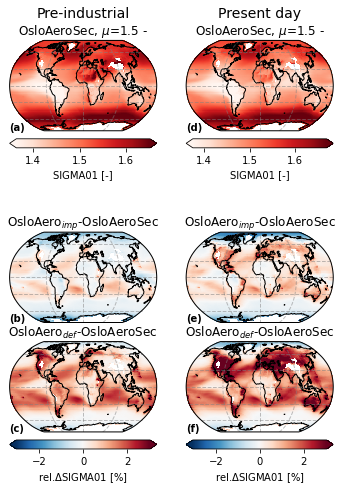

In [116]:
var = 'SIGMA01'
relative = True
fig, axs_dic = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   relative=relative,

                                   # , 'ACTNL_incld', 'ACTREL_incld'],
                                   # norm_abs=norm_abs,
                                   # norm_dic=norm_dic
                                   type_nndic={'PI': 'Pre-industrial', 'PIaerPD': 'Present day'}
                                   )
fig.savefig(filen_base + f'{var}_PIPD_sep_rel{relative}.pdf', dpi=300)
plt.show()

<xarray.DataArray 'NMR01' ()>
array(15.80813561)
Coordinates:
    quantile  float64 0.05 <xarray.DataArray 'NMR01' ()>
array(-15.80813561)
Coordinates:
    quantile  float64 0.05
0 PI
1 PIaerPD
0 PI


/home/ubuntu/mnts/nird/projects/SECT_SENS/sect_sens/util/plot/plot_maps.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


1 PIaerPD


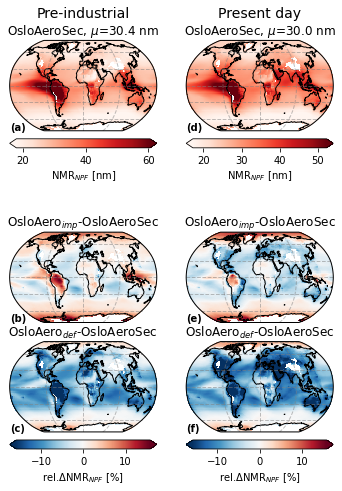

In [117]:
var = 'NMR01'
relative = True
fig, axs_dic = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   relative=relative,

                                   # , 'ACTNL_incld', 'ACTREL_incld'],
                                   # norm_abs=norm_abs,
                                   # norm_dic=norm_dic
                                   type_nndic={'PI': 'Pre-industrial', 'PIaerPD': 'Present day'}
                                   )
fig.savefig(filen_base + f'{var}_PIPD_sep_rel{relative}.pdf', dpi=300)
plt.show()

<xarray.DataArray 'NMR01' ()>
array(18.77632212)
Coordinates:
    quantile  float64 0.95 <xarray.DataArray 'NMR01' ()>
array(-18.77632212)
Coordinates:
    quantile  float64 0.95
0 PI
1 PIaerPD
0 PI


/home/ubuntu/mnts/nird/projects/SECT_SENS/sect_sens/util/plot/plot_maps.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


1 PIaerPD


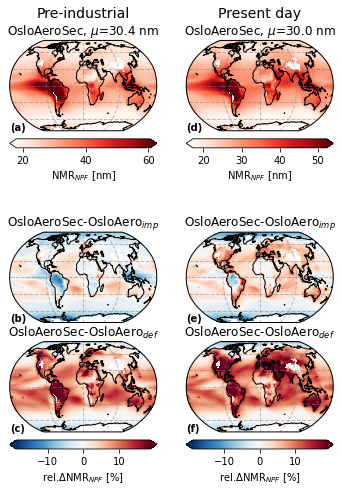

In [118]:
var = 'NMR01'
relative = True
fig, axs_dic = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   relative=relative,
                                   type_nndic={'PI': 'Pre-industrial', 'PIaerPD': 'Present day'},
                                   switch_diff=True
                                   )
fig.savefig(filen_base + f'{var}_PIPD_sep_rel{relative}.pdf', dpi=300)
plt.show()

<xarray.DataArray 'NCONC08' ()>
array(1.65241615)
Coordinates:
    quantile  float64 0.95 <xarray.DataArray 'NCONC08' ()>
array(-1.65241615)
Coordinates:
    quantile  float64 0.95
0 PI
1 PIaerPD
0 PI


/home/ubuntu/mnts/nird/projects/SECT_SENS/sect_sens/util/plot/plot_maps.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


1 PIaerPD


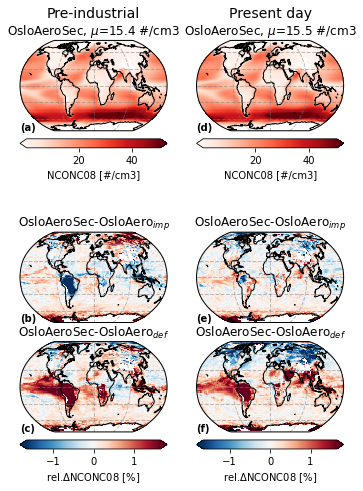

In [119]:
var = 'NCONC08'
relative = True
fig, axs_dic = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   relative=relative,
                                   type_nndic={'PI': 'Pre-industrial', 'PIaerPD': 'Present day'},
                                   switch_diff=True

                                   )
fig.savefig(filen_base + f'{var}_PIPD_sep_rel{relative}.pdf', dpi=300)
plt.show()

<xarray.DataArray 'NMR08' ()>
array(6.701772)
Coordinates:
    quantile  float64 0.95 <xarray.DataArray 'NMR08' ()>
array(-6.701772)
Coordinates:
    quantile  float64 0.95
0 PI
1 PIaerPD
0 PI


/home/ubuntu/mnts/nird/projects/SECT_SENS/sect_sens/util/plot/plot_maps.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


1 PIaerPD


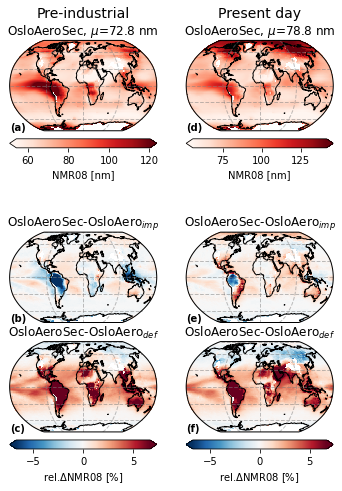

In [120]:
var = 'NMR08'
relative = True
fig, axs_dic = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   relative=relative,
                                   type_nndic={'PI': 'Pre-industrial', 'PIaerPD': 'Present day'},
                                   switch_diff=True
                                   )
fig.savefig(filen_base + f'{var}_PIPD_sep_rel{relative}.pdf', dpi=300)
plt.show()

<xarray.DataArray 'NMR09' ()>
array(0.98052036)
Coordinates:
    quantile  float64 0.95 <xarray.DataArray 'NMR09' ()>
array(-0.98052036)
Coordinates:
    quantile  float64 0.95
0 PI
1 PIaerPD
0 PI


/home/ubuntu/mnts/nird/projects/SECT_SENS/sect_sens/util/plot/plot_maps.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


1 PIaerPD


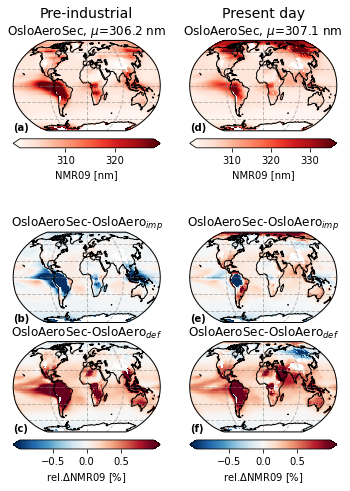

In [121]:
var = 'NMR09'
relative = True
fig, axs_dic = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   relative=relative,
                                   type_nndic={'PI': 'Pre-industrial', 'PIaerPD': 'Present day'},
                                   switch_diff=True
                                   )
fig.savefig(filen_base + f'{var}_PIPD_sep_rel{relative}.pdf', dpi=300)
plt.show()

<xarray.DataArray 'NCONC09' ()>
array(1.03777111)
Coordinates:
    quantile  float64 0.95 <xarray.DataArray 'NCONC09' ()>
array(-1.03777111)
Coordinates:
    quantile  float64 0.95
0 PI
1 PIaerPD
0 PI


/home/ubuntu/mnts/nird/projects/SECT_SENS/sect_sens/util/plot/plot_maps.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


1 PIaerPD


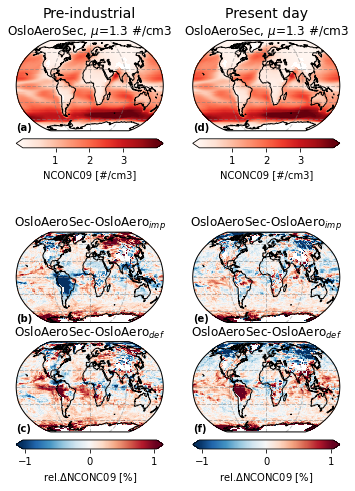

In [122]:
var = 'NCONC09'
relative = True
fig, axs_dic = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   relative=relative,
                                   type_nndic={'PI': 'Pre-industrial', 'PIaerPD': 'Present day'},
                                   switch_diff=True
                                   )
fig.savefig(filen_base + f'{var}_PIPD_sep_rel{relative}.pdf', dpi=300)
plt.show()

<xarray.DataArray 'N_AER' ()>
array(51.3426326)
Coordinates:
    quantile  float64 0.05 <xarray.DataArray 'N_AER' ()>
array(-51.3426326)
Coordinates:
    quantile  float64 0.05
0 PI
1 PIaerPD
0 PI


/home/ubuntu/mnts/nird/projects/SECT_SENS/sect_sens/util/plot/plot_maps.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


1 PIaerPD


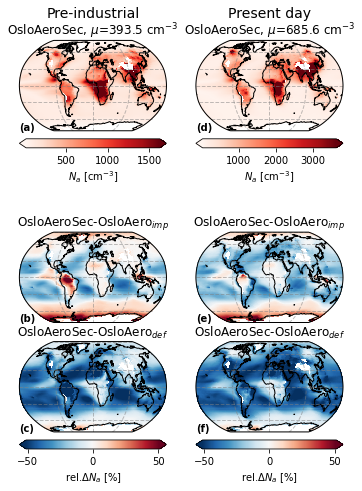

In [123]:
var = 'N_AER'
relative = True
fig, axs_dic = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   relative=relative,
                                   type_nndic={'PI': 'Pre-industrial', 'PIaerPD': 'Present day'},
                                   switch_diff=True
                                   )
fig.savefig(filen_base + f'{var}_PIPD_sep_rel{relative}.pdf', dpi=300)
plt.show()